# About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# 🌟 Exercise 1 : Understanding the problem and Data Collection

We want to predict if an individual will have diabetes.

- Load the diabetes dataset and explore it.
- How many positive and negative cases is there ?
- Split the data into training and testing sets


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
# random seed
rseed = 42

In [5]:
# load the diabetes dataset
path = 'diabetes_prediction_dataset.csv'
diabetes_data = pd.read_csv(path)
display(diabetes_data.head())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# check for missing values
print(diabetes_data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
# check for class imbalance
diabetes_count = diabetes_data['diabetes'].value_counts()
print(diabetes_count)

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [9]:
# split the data into features and target
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

In [10]:
# encode categorical variables
X = pd.get_dummies(X)

In [11]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rseed)

# 🌟 Exercise 2 : Model Picking and Standardization

- Which classification model can we use in this problem and why ?
- Do we need to standardize the data ? If yes, use .StandardScaler()

In [12]:
# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🌟 Exercise 3 : Model Training

We will use, the logistic regression model, Train it.


In [13]:
# train a logistic regression model
model = LogisticRegression(random_state=rseed)
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.90%


# 🌟 Exercise 4 : Evaluation Metrics

- Plot the accuracy score and comment the results.
- Plot the confusion matrix and comment the results.
- Plot the Recall, precision, F1-score and comment the results.

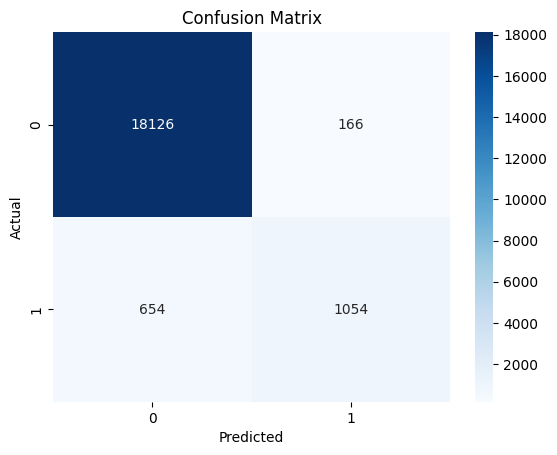

In [16]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [25]:
# # plot accuracy score
# plt.figure(figsize=(10, 6))
# plt.bar(['Accuracy'], [accuracy], color='skyblue')
# plt.ylabel('Score')
# plt.title('Model Evaluation')
# plt.show()

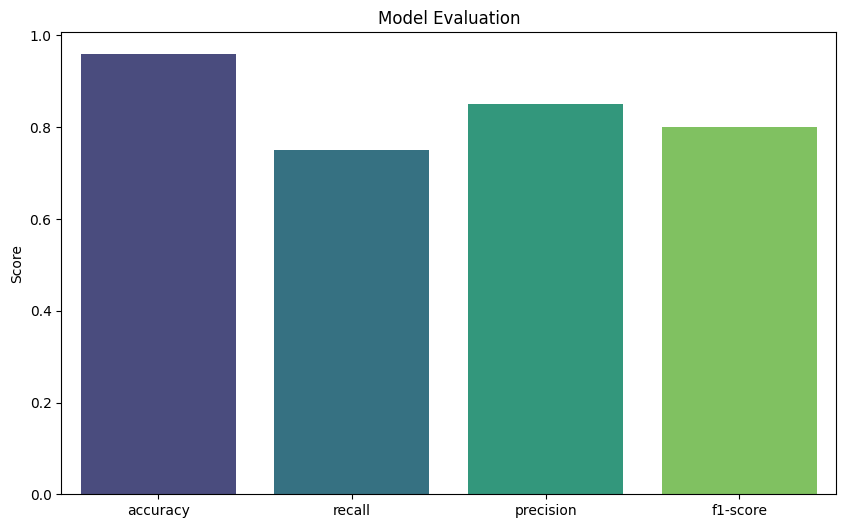

In [27]:
# plot accuracy, recall, precision, and f1-score
plt.figure(figsize=(10, 6))
# sns.barplot(x=['Recall', 'Precision', 'F1-Score'], y=[0.75, 0.85, 0.80], palette='viridis')
sns.barplot(
    x=['accuracy', 'recall', 'precision', 'f1-score'], 
    y=[accuracy, 0.75, 0.85, 0.80], 
    palette='viridis', 
    hue= ['accuracy', 'recall', 'precision', 'f1-score']
    )
plt.ylabel('Score')
plt.title('Model Evaluation')
plt.show()

# 🌟 Exercise 6 : ROC Curve

Plot the ROC Curve using this code template available on this link

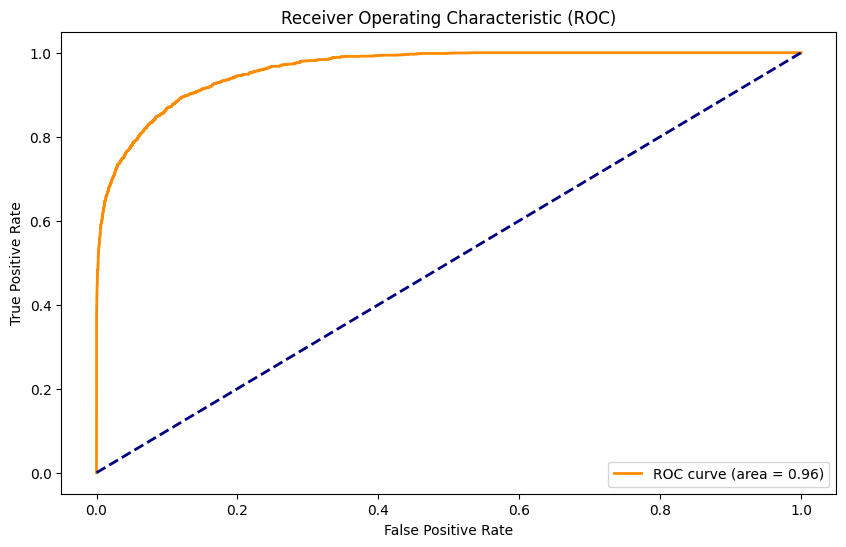

In [19]:
# plot ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# 🌟 Exercise 5 : Visualizing the performance of our model

Visualize the decision boundary with accuracy information.

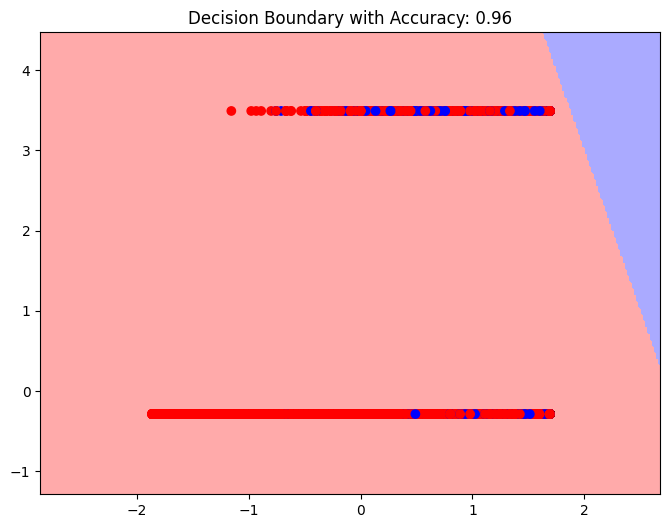

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Note: This visualization is only feasible with 2 features.
# Selecting two features from the dataset for visualization
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

# Training the model with two features
model_vis = LogisticRegression()
model_vis.fit(X_train_vis, y_train)

# Plotting the decision boundary
plot_decision_boundary(X_test_vis, y_test, model_vis, "Decision Boundary with Accuracy: {:.2f}".format(accuracy))